In [6]:
from neural_net import *
import pandas as pd
import numpy as np
from numpy.random import normal as N
import math
import time
from evolving_neural_net import EvolvingNeuralNet
rng = np.random.default_rng()

In [7]:
datapoints = [
    (0.0, 1.0), (0.04, 0.81), (0.08, 0.52), (0.12, 0.2), (0.17, -0.12),
    (0.21, -0.38), (0.25, -0.54), (0.29, -0.58), (0.33, -0.51), (0.38, -0.34),
    (0.42, -0.1), (0.46, 0.16), (0.5, 0.39), (0.54, 0.55), (0.58, 0.61),
    (0.62, 0.55), (0.67, 0.38), (0.71, 0.12), (0.75, -0.19), (0.79, -0.51),
    (0.83, -0.77), (0.88, -0.95), (0.92, -1.0), (0.96, -0.91), (1.0, -0.7)
]

In [8]:
tanh = np.vectorize(lambda x: (math.e ** x - math.e ** -x) / (math.e ** x + math.e ** -x))
tanh_prime = np.vectorize(lambda x: 4 / ((math.e ** x + math.e ** -x) ** 2))

In [9]:
num_nodes_by_layer = [1, 10, 6, 3, 1]
num_nets = 15
activation_functions_and_derivatives = [[tanh, tanh_prime] for _ in range(4)]

In [10]:
evolving_neural_net = EvolvingNeuralNet(num_nodes_by_layer, num_nets, activation_functions_and_derivatives, datapoints, 0.01, 0.05)
evolving_neural_net.train(50, log=True)
print(evolving_neural_net.average_RSS)

Average RSS: [[8.41164164]]; Average mutation rate: 0.04772967486184411
Average RSS: [[8.38719328]]; Average mutation rate: 0.050593894071965115
Average RSS: [[8.37203698]]; Average mutation rate: 0.04810057689342268
Average RSS: [[8.35444144]]; Average mutation rate: 0.047001985246758145
Average RSS: [[8.34465508]]; Average mutation rate: 0.050068869336757346
Average RSS: [[8.33758719]]; Average mutation rate: 0.05024206163358236
Average RSS: [[8.33406661]]; Average mutation rate: 0.052277030613949345
Average RSS: [[8.32309749]]; Average mutation rate: 0.05543718133206225
Average RSS: [[8.30960451]]; Average mutation rate: 0.055396392123162434
Average RSS: [[8.29733235]]; Average mutation rate: 0.05058583655796836
Average RSS: [[8.27107149]]; Average mutation rate: 0.051137991026654325
Average RSS: [[8.25323604]]; Average mutation rate: 0.04017215009663101
Average RSS: [[8.23003233]]; Average mutation rate: 0.03753882927555121
Average RSS: [[8.21952755]]; Average mutation rate: 0.0354

[]

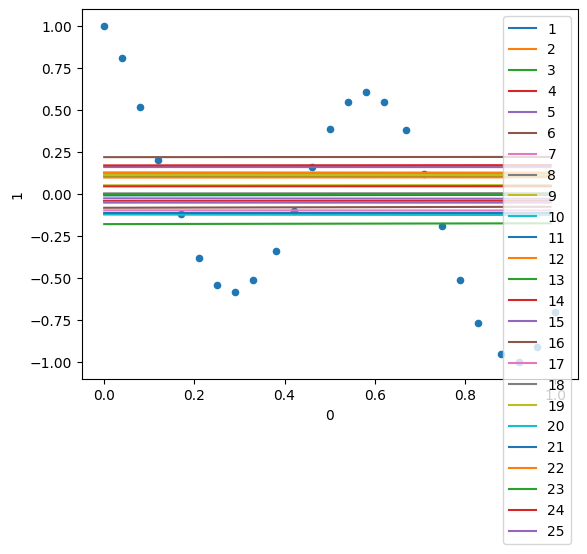

In [ ]:
nn_df = pd.DataFrame([[x / 100, *[float(neural_net.predict(np.matrix(x / 100))) for neural_net in neural_nets]]
                     for x in range(100)])
datapoint_df = pd.DataFrame(datapoints)
datapoint_plot = datapoint_df.plot(x=0, y=1, kind="scatter")
for i in range(25):
    datapoint_plot = nn_df.plot(ax=datapoint_plot, x=0, y=i+1)
datapoint_plot.plot()

In [ ]:
beginning = time.time()
data = [beginning, 0]

for i in range(500):
    neural_nets = next_generation(neural_nets)
    if time.time() - data[0] > 5:
        print(i + 1, 'completed;', (i - data[1]) / (time.time() - data[0]), 'per second in last interval;', (i + 1) / (time.time() - beginning), 'iter/s overall')
        data = [time.time(), i]
    print('avg RSS at generation', i + 1, sum(neural_net.compute_RSS() for neural_net in neural_nets) / 25)
    print('avg mutation rate', sum(neural_net.mutation_rate for neural_net in neural_nets) / 25)

avg RSS at generation 1 [[8.4323702]]
avg mutation rate 0.051300776142440926
2 completed; 0.13332008069698525 per second in last interval; 0.266640102066044 iter/s overall
avg RSS at generation 2 [[8.35688228]]
avg mutation rate 0.051377616802780635
avg RSS at generation 3 [[8.3481666]]
avg mutation rate 0.05090521744349255
4 completed; 0.25869594682006375 per second in last interval; 0.26260188742226565 iter/s overall
avg RSS at generation 4 [[8.31773769]]
avg mutation rate 0.05192220565920108
avg RSS at generation 5 [[8.28903546]]
avg mutation rate 0.04734219182055131
6 completed; 0.25371677357960587 per second in last interval; 0.2595706570637848 iter/s overall
avg RSS at generation 6 [[8.26217444]]
avg mutation rate 0.046536430508970925
avg RSS at generation 7 [[8.18484201]]
avg mutation rate 0.05036244769869747
8 completed; 0.26203213684308085 per second in last interval; 0.26018070082352635 iter/s overall
avg RSS at generation 8 [[8.05489977]]
avg mutation rate 0.0509683260115131

KeyboardInterrupt: 

[]

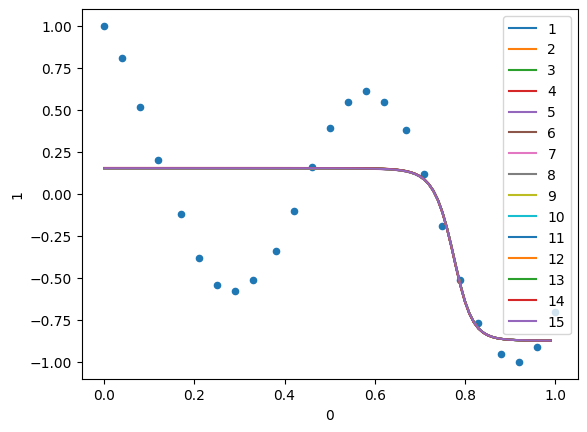

In [ ]:
nn_df = pd.DataFrame([[x / 100, *[float(neural_net.predict(np.matrix(x / 100))) for neural_net in neural_nets]]
                     for x in range(100)])
datapoint_df = pd.DataFrame(datapoints)
datapoint_plot = datapoint_df.plot(x=0, y=1, kind="scatter")
for i in range(15):
    datapoint_plot = nn_df.plot(ax=datapoint_plot, x=0, y=i+1)
datapoint_plot.plot()
